<a href="https://colab.research.google.com/github/ommathur54/Python/blob/master/Neerav_fashion_minist_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Fashion Mnist Data Set-----> ANN





In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
# loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


Using TensorFlow backend.


In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape,y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


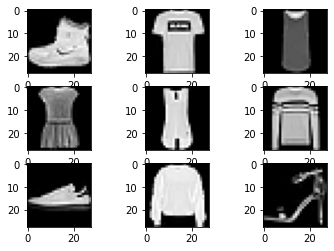

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
print(y_train)

# one hot encode target values
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

[9 0 0 ... 3 0 5]


In [ ]:
print(y_train) # this just for me to cross check ...

[9 0 0 ... 3 0 5]


In [ ]:
print(x_train.dtype)

print(y_train.dtype)

uint8
uint8


In [ ]:
x_valid, x_train = x_train[:5000]/255. , x_train[5000:]/255.

y_valid, y_train = y_train[:5000], y_train[5000:]


(-0.5, 27.5, 27.5, -0.5)

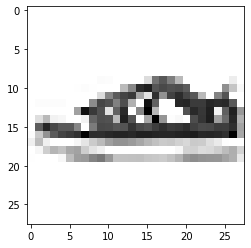

In [ ]:
plt.imshow(x_train[500],cmap="binary")
plt.axis("on")


(-0.5, 27.5, 27.5, -0.5)

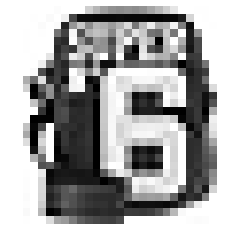

In [ ]:
plt.imshow(x_train[1000],cmap="binary")
plt.axis("off")

In [ ]:
#creating list of layers 
l = [tf.keras.layers.Flatten(input_shape = [28,28], name ="inputlayer"),
tf.keras.layers.Dense(300,activation = "relu", name = "hiddenlayer1"),
tf.keras.layers.Dense(100,activation = "relu", name = "hiddenlayer2"),
tf.keras.layers.Dense(10,activation = "softmax", name = "hiddenlayer3")]

In [ ]:
model_clf = tf.keras.models.Sequential(l)


model_clf.layers


model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenlayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
hiddenlayer3 (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hiddenlayer1 = model_clf.layers[1]
print(hiddenlayer1.name)


model_clf.get_layer(hiddenlayer1.name) is hiddenlayer1

type(hiddenlayer1.get_weights())


print(hiddenlayer1.get_weights())

hiddenlayer1
[array([[ 0.04761714, -0.01828359,  0.06593755, ..., -0.04639629,
        -0.04850413,  0.06760363],
       [-0.01396577, -0.06397107,  0.0304458 , ..., -0.0734911 ,
         0.05391127, -0.00385667],
       [-0.04138225, -0.00814421,  0.04245227, ..., -0.07402975,
        -0.06045339,  0.00937024],
       ...,
       [ 0.00685174, -0.04356688,  0.00272434, ...,  0.06526436,
        -0.05745484,  0.04814173],
       [-0.05834922, -0.05657417,  0.02977592, ...,  0.00810418,
        -0.0648064 , -0.03856002],
       [ 0.04694475, -0.03109343,  0.01137147, ...,  0.02843087,
         0.06472263,  0.0703309 ]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weight, biases = hiddenlayer1.get_weights()

print("shape\n", weight.shape)
print(weight)

print("shape\n", biases.shape)
print(biases)

shape
 (784, 300)
[[ 0.04761714 -0.01828359  0.06593755 ... -0.04639629 -0.04850413
   0.06760363]
 [-0.01396577 -0.06397107  0.0304458  ... -0.0734911   0.05391127
  -0.00385667]
 [-0.04138225 -0.00814421  0.04245227 ... -0.07402975 -0.06045339
   0.00937024]
 ...
 [ 0.00685174 -0.04356688  0.00272434 ...  0.06526436 -0.05745484
   0.04814173]
 [-0.05834922 -0.05657417  0.02977592 ...  0.00810418 -0.0648064
  -0.03856002]
 [ 0.04694475 -0.03109343  0.01137147 ...  0.02843087  0.06472263
   0.0703309 ]]
shape
 (300,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
loss_function = "sparse_categorical_crossentropy" #use => tf.losses.sparse_categorical_crossentropy 


optimize = "SGD" # we can use custom learing rate => tf.keras.optimizer.SGD(0.02)

metrics = ["accuracy"]


model_clf.compile(loss= loss_function, optimizer = optimize, metrics = metrics)

In [ ]:
Epochs = 30

validation_set = (x_valid, y_valid)

history = model_clf.fit(x_train, y_train, epochs= Epochs, validation_data = validation_set)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9896 - accuracy: 0.6956 - val_loss: 0.4984 - val_accuracy: 0.8328
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4976 - accuracy: 0.8286 - val_loss: 0.4600 - val_accuracy: 0.8468
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4506 - accuracy: 0.8431 - val_loss: 0.4272 - val_accuracy: 0.8532
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4256 - accuracy: 0.8522 - val_loss: 0.4469 - val_accuracy: 0.8362
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3990 - accuracy: 0.8604 - val_loss: 0.4116 - val_accuracy: 0.8602
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3809 - accuracy: 0.8648 - val_loss: 0.3782 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3662 - accuracy: 0.8722 - val_loss: 0.3703 - val_accuracy:

In [ ]:
#creating model 
import time 
import os 


def saveModel_path(model_dir = "neerav_fashion_saved_models"):
	os.makedirs(model_dir, exist_ok = True)
	filename = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
	model_path = os.path.join(model_dir, filename)
	print(f"your fashion model will be saved at the followin location\n{model_path}")
	return(model_path)

In [ ]:
unique_path = model_clf.save(saveModel_path())

your fashion model will be saved at the followin location
neerav_fashion_saved_models/Model_2021_06_04_10_47_37_.h5
